# Implementación

El conjunto de datos "Voices Heard" es una colección completa de informes y quejas presentadas por estudiantes en un entorno universitario. Desde quejas académicas hasta preocupaciones sobre la seguridad del campus, este conjunto de datos ofrece una gran cantidad de conocimientos sobre la experiencia de los estudiantes, proporcionando comentarios valiosos para los administradores y educadores universitarios. Con su diversa gama de comentarios, "Voices Heard" ofrece una oportunidad única para comprender mejor las necesidades e inquietudes de los estudiantes y desarrollar soluciones basadas en datos para mejorar la experiencia universitaria para todos.

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import string
import re
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import VarianceThreshold
from scipy.spatial.distance import cosine
from unidecode import unidecode
from sklearn.tree import plot_tree

# Gráficos
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from wordcloud import WordCloud

# Preprocesado y modelado
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score


# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dania\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dania\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dania\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Leyendo el conjunto de datos

In [2]:
data = pd.read_csv("voices_heard.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Genre        1005 non-null   object 
 1   Reports      1005 non-null   object 
 2   Age          1005 non-null   int64  
 3   Gpa          1005 non-null   float64
 4   Year         1005 non-null   int64  
 5   Count        1005 non-null   int64  
 6   Gender       1005 non-null   object 
 7   Nationality  1005 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.9+ KB
None


## Inspección y tratamiento de los datos

Verificando que el conjunto de datos no tiene variables con valores faltantes o nulos

In [3]:
data.isnull().sum()

Genre          0
Reports        0
Age            0
Gpa            0
Year           0
Count          0
Gender         0
Nationality    0
dtype: int64

Se cuenta el numero de filas del Dataset



In [4]:
total_filas = data.shape[0]
print("Total de filas:", total_filas)

Total de filas: 1005


In [5]:
print(data.head())

                            Genre  \
0  Academic Support and Resources   
1  Academic Support and Resources   
2  Academic Support and Resources   
3  Academic Support and Resources   
4  Academic Support and Resources   

                                             Reports  Age   Gpa  Year  Count  \
0  The limited access to research databases and m...   27  2.18     2      1   
1  I'm having trouble finding the course material...   23  3.11     2      1   
2  It's frustrating to have limited access to res...   20  3.68     2      1   
3  I'm really struggling in one of my classes but...   20  1.30     2      1   
4   I am really struggling with understanding the...   26  2.50     2      1   

  Gender Nationality  
0      M       Egypt  
1      F       Egypt  
2      F       Egypt  
3      F       Egypt  
4      F       Egypt  


# Inspección de datos visual

## Histograma

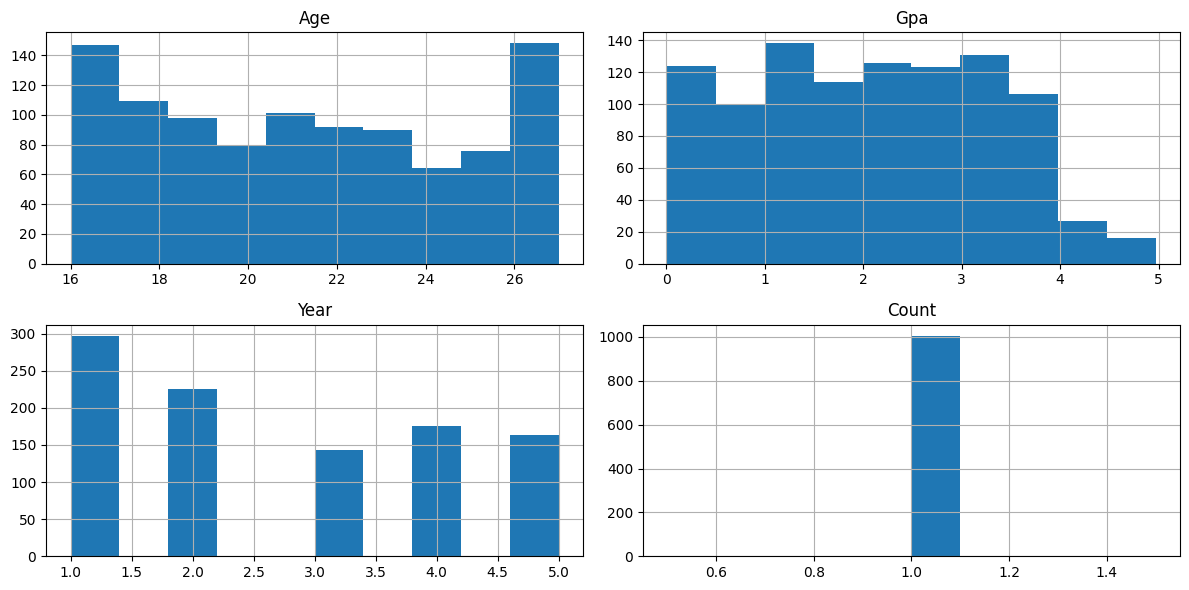

In [6]:
data.hist(figsize=(12, 6))
plt.tight_layout()
plt.show()

## Diagrama de cajas

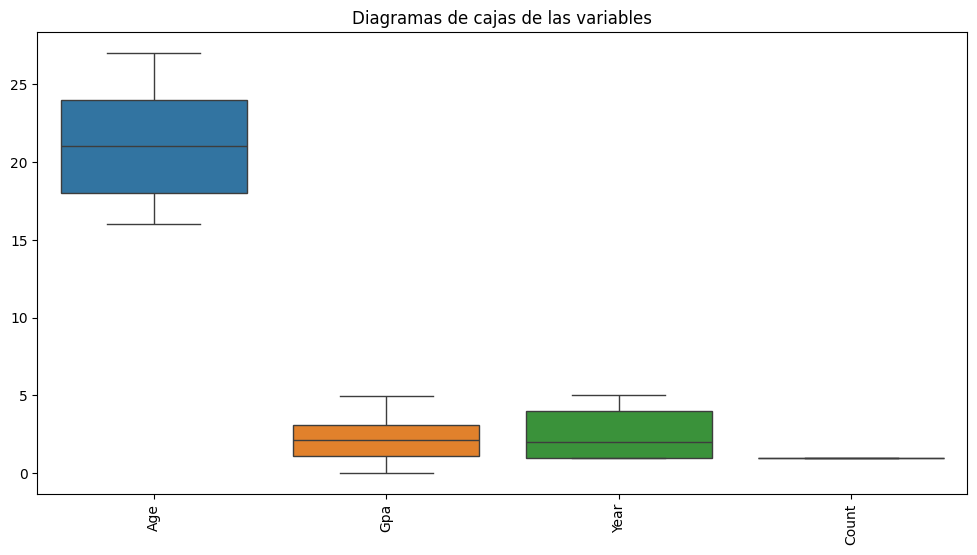

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Diagramas de cajas de las variables')
plt.xticks(rotation=90)
plt.show()

# Resumen estadístico

## Variables numéricas

In [8]:
numeric_data = data[['Age', 'Gpa', 'Year', 'Count']]

## Resumen estadístico para variables numéricas

In [9]:
summary_statistics = numeric_data.describe()
print(summary_statistics)

               Age          Gpa         Year   Count
count  1005.000000  1005.000000  1005.000000  1005.0
mean     21.298507     2.088856     2.684577     1.0
std       3.338841     1.208738     1.461665     0.0
min      16.000000     0.010000     1.000000     1.0
25%      18.000000     1.080000     1.000000     1.0
50%      21.000000     2.110000     2.000000     1.0
75%      24.000000     3.090000     4.000000     1.0
max      27.000000     4.970000     5.000000     1.0


## Calculo de media y mediana

In [10]:
means = numeric_data.mean()
medians = numeric_data.median()

print("\nMedias:")
print(means)

print("\nMedianas:")
print(medians)


Medias:
Age      21.298507
Gpa       2.088856
Year      2.684577
Count     1.000000
dtype: float64

Medianas:
Age      21.00
Gpa       2.11
Year      2.00
Count     1.00
dtype: float64


## Estimar percentiles para variables numéricas

In [11]:
percentiles = numeric_data.quantile([0.25, 0.5, 0.75])
print(percentiles)

       Age   Gpa  Year  Count
0.25  18.0  1.08   1.0    1.0
0.50  21.0  2.11   2.0    1.0
0.75  24.0  3.09   4.0    1.0


## Posibles correlaciones

In [12]:
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

            Age       Gpa      Year  Count
Age    1.000000 -0.037937 -0.012322    NaN
Gpa   -0.037937  1.000000  0.020474    NaN
Year  -0.012322  0.020474  1.000000    NaN
Count       NaN       NaN       NaN    NaN


# Limpieza de los datos

Removiendo columna Count irrelevante

In [13]:
data = data.drop(data.columns[5], axis=1)

Se muestran las columnas del dataset

In [14]:
data[['Genre','Reports', 'Age', 'Gpa', 'Year', 'Gender', 'Nationality']].head()

,Genre,Reports,Age,Gpa,Year,Gender,Nationality
0,Academic Support and Resources,The limited access to research databases and m...,27,2.18,2,M,Egypt
1,Academic Support and Resources,I'm having trouble finding the course material...,23,3.11,2,F,Egypt
2,Academic Support and Resources,It's frustrating to have limited access to res...,20,3.68,2,F,Egypt
3,Academic Support and Resources,I'm really struggling in one of my classes but...,20,1.30,2,F,Egypt
4,Academic Support and Resources,I am really struggling with understanding the...,26,2.50,2,F,Egypt
